Import important files

In [192]:
import numpy as np
from scipy.stats import lognorm
import networkx as nx
import geopandas as gpd
import matplotlib.pylab as plt
import wntr

In [193]:
# Create a WaterNetworkModel from an EPANET INP file
wn = wntr.network.WaterNetworkModel('/Users/abel/Desktop/CIE_500/ky4.inp')

In [194]:
# Print a basic description of the model.  The level can be 0, 1, or 2 and defines the level of detail included in the description.
wn.describe(level=1)

{'Nodes': {'Junctions': 959, 'Tanks': 4, 'Reservoirs': 1},
 'Links': {'Pipes': 1156, 'Pumps': 2, 'Valves': 0},
 'Patterns': 3,
 'Curves': {'Pump': 0, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 2}

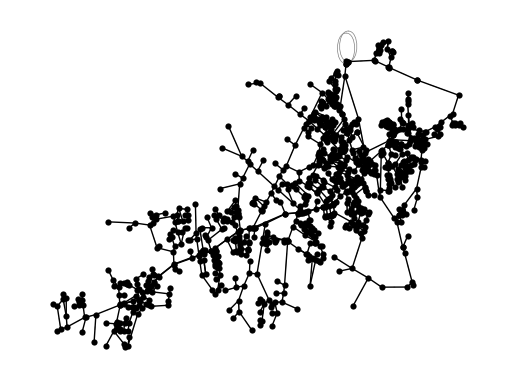

In [195]:
# Plot a basic network graphic
ax = wntr.graphics.plot_network(wn)

In [196]:
# Print the names of all junctions, tanks, and reservoirs
print("Node names", wn.node_name_list)

Node names ['J-1', 'J-10', 'J-100', 'J-101', 'J-102', 'J-103', 'J-104', 'J-105', 'J-106', 'J-107', 'J-108', 'J-109', 'J-11', 'J-110', 'J-111', 'J-112', 'J-113', 'J-114', 'J-115', 'J-116', 'J-117', 'J-118', 'J-119', 'J-12', 'J-120', 'J-121', 'J-122', 'J-123', 'J-124', 'J-125', 'J-126', 'J-127', 'J-128', 'J-129', 'J-13', 'J-130', 'J-131', 'J-132', 'J-133', 'J-134', 'J-135', 'J-136', 'J-137', 'J-138', 'J-14', 'J-140', 'J-141', 'J-142', 'J-143', 'J-144', 'J-145', 'J-146', 'J-147', 'J-148', 'J-149', 'J-15', 'J-150', 'J-151', 'J-152', 'J-153', 'J-154', 'J-155', 'J-156', 'J-157', 'J-158', 'J-159', 'J-16', 'J-160', 'J-161', 'J-162', 'J-163', 'J-164', 'J-165', 'J-166', 'J-167', 'J-168', 'J-169', 'J-17', 'J-170', 'J-171', 'J-172', 'J-173', 'J-174', 'J-175', 'J-176', 'J-177', 'J-178', 'J-179', 'J-18', 'J-180', 'J-181', 'J-182', 'J-183', 'J-184', 'J-185', 'J-186', 'J-187', 'J-188', 'J-189', 'J-19', 'J-190', 'J-191', 'J-192', 'J-194', 'J-195', 'J-196', 'J-197', 'J-198', 'J-199', 'J-2', 'J-20', 'J-2

In [197]:
# Print the names of just tanks
print("Tank names", wn.tank_name_list)

Tank names ['T-1', 'T-2', 'T-3', 'T-4']


In [198]:
# Get a tank object
tank = wn.get_node('T-1')
print(type(tank))
tank

<class 'wntr.network.elements.Tank'>


<Tank 'T-1', elevation=196.940424, min_level=24.039576000000004, max_level=31.659576, diameter=17.6784, min_vol=0.0, vol_curve='None'>

In [199]:
# Print the names of all pipes, pumps, and valves
print("Link names", wn.link_name_list)

Link names ['P-1', 'P-10', 'P-100', 'P-1000', 'P-1001', 'P-1002', 'P-1003', 'P-1004', 'P-1005', 'P-1006', 'P-1007', 'P-1008', 'P-1009', 'P-101', 'P-1010', 'P-1011', 'P-1012', 'P-1013', 'P-1014', 'P-1015', 'P-1016', 'P-1017', 'P-1018', 'P-1019', 'P-102', 'P-1020', 'P-1021', 'P-1022', 'P-1023', 'P-1024', 'P-1025', 'P-1026', 'P-1027', 'P-1028', 'P-1029', 'P-103', 'P-1030', 'P-1031', 'P-1032', 'P-1033', 'P-1034', 'P-1035', 'P-1036', 'P-1037', 'P-1038', 'P-1039', 'P-104', 'P-1040', 'P-1041', 'P-1042', 'P-1043', 'P-1044', 'P-1045', 'P-1046', 'P-1047', 'P-1048', 'P-1049', 'P-105', 'P-1050', 'P-1051', 'P-1052', 'P-1053', 'P-1054', 'P-1055', 'P-1056', 'P-1057', 'P-1058', 'P-1059', 'P-106', 'P-1060', 'P-1061', 'P-1062', 'P-1063', 'P-1064', 'P-1065', 'P-1066', 'P-1067', 'P-1068', 'P-1069', 'P-107', 'P-1070', 'P-1071', 'P-1072', 'P-1073', 'P-1074', 'P-1075', 'P-1076', 'P-1077', 'P-1078', 'P-1079', 'P-108', 'P-1080', 'P-1081', 'P-1082', 'P-1083', 'P-1084', 'P-1085', 'P-1086', 'P-1087', 'P-1088', 'P

In [200]:
# Print the names of just head pumps
print("Head pump names", wn.head_pump_name_list)

Head pump names []


In [201]:
wn.pump_name_list

['~@Pump-1', '~@Pump-2']

In [202]:
# Get a pipe object
pipe = wn.get_link('P-105')
print(type(pipe))
pipe

<class 'wntr.network.elements.Pipe'>


<Pipe 'P-105' from 'J-180' to 'J-168', length=57.241440000000004, diameter=0.2032, roughness=150.0, minor_loss=0.0, check_valve=False, status=Open>

In [203]:
# Convert the WaterNetworkModel to a MultiDiGraph
G = wntr.network.to_graph(wn)
print(G)

MultiDiGraph with 964 nodes and 1158 edges


In [204]:
# Print the WaterNetworkModel options
wn.options

Options(time=TimeOptions(duration=0.0, hydraulic_timestep=3600, quality_timestep=3600, rule_timestep=360, pattern_timestep=3600, pattern_start=0.0, report_timestep=3600, report_start=0.0, start_clocktime=0.0, statistic='NONE', pattern_interpolation=False), hydraulic=HydraulicOptions(headloss='H-W', hydraulics=None, hydraulics_filename=None, viscosity=1.0, specific_gravity=1.0, pattern='1', demand_multiplier=1.0, demand_model='DDA', minimum_pressure=0.0, required_pressure=0.07, pressure_exponent=0.5, emitter_exponent=0.5, trials=100, accuracy=0.0001, unbalanced='CONTINUE', unbalanced_value=10, checkfreq=2, maxcheck=10, damplimit=0.0, headerror=0.0, flowchange=0.0, inpfile_units='GPM', inpfile_pressure_units=None), report=ReportOptions(pagesize=0, report_filename=None, status='FULL', summary='NO', energy='NO', nodes=False, links=False, report_params={'elevation': False, 'demand': True, 'head': True, 'pressure': True, 'quality': True, 'length': False, 'diameter': False, 'flow': True, 'vel

In [205]:
# Change the simulation duration to 2 days
wn.options.time.duration = 2*24*3600 # seconds
print(wn.options.time)

TimeOptions(duration=172800.0, hydraulic_timestep=3600, quality_timestep=3600, rule_timestep=360, pattern_timestep=3600, pattern_start=0.0, report_timestep=3600, report_start=0.0, start_clocktime=0.0, statistic='NONE', pattern_interpolation=False)


In [206]:
# Change the simulation to use pressure dependent hydraulic analysis
wn.options.hydraulic.demand_model = 'PDD'
wn.options.hydraulic.required_pressure = 20 # m
wn.options.hydraulic.minimum_pressure = 2 # m
print(wn.options.hydraulic)

HydraulicOptions(headloss='H-W', hydraulics=None, hydraulics_filename=None, viscosity=1.0, specific_gravity=1.0, pattern='1', demand_multiplier=1.0, demand_model='PDA', minimum_pressure=2.0, required_pressure=20.0, pressure_exponent=0.5, emitter_exponent=0.5, trials=100, accuracy=0.0001, unbalanced='CONTINUE', unbalanced_value=10, checkfreq=2, maxcheck=10, damplimit=0.0, headerror=0.0, flowchange=0.0, inpfile_units='GPM', inpfile_pressure_units=None)


In [207]:
# Simulate hydraulics using the WNTRSimulator
sim = wntr.sim.WNTRSimulator(wn)
results_WNTR = sim.run_sim()

Text(0, 0.5, 'Pump flowrate (m$^3$/s)')

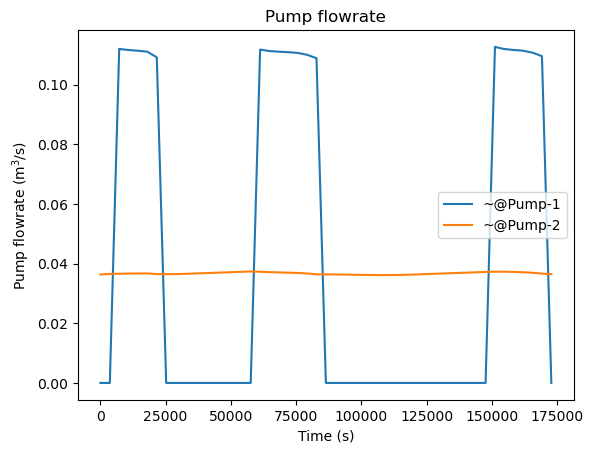

In [ ]:
# Plot timeseries of pump flowrates
pump_flowrates = results_WNTR.link['flowrate'].loc[:,wn.pump_name_list] 
ax = pump_flowrates.plot(title='Pump flowrate')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

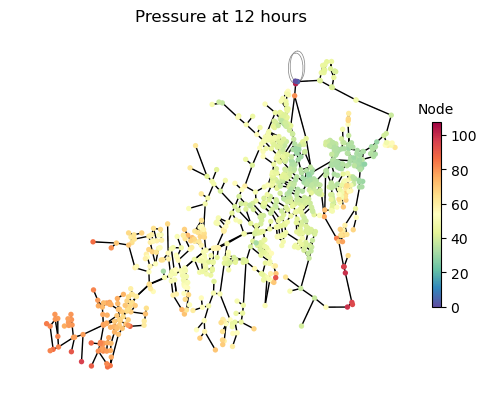

In [209]:
# Plot pressure at hour 12 on the network
pressure_at_12hr = results_WNTR.node['pressure'].loc[12*3600, :]
ax = wntr.graphics.plot_network(wn, node_attribute=pressure_at_12hr, node_size=15, title='Pressure at 12 hours')


In [210]:
results_WNTR.node['pressure'].value_counts

<bound method DataFrame.value_counts of               J-1       J-10      J-100      J-101      J-102      J-103  \
0       51.758335  56.283857  34.750255  30.799108  34.669729  33.979296   
3600    51.917105  57.622259  34.175700  32.050460  33.742621  33.052188   
7200    52.812756  58.943913  33.930753  33.282723  34.162110  33.471677   
10800   53.668376  60.253094  33.718088  34.495256  34.166959  33.476526   
14400   54.381039  61.529219  33.620282  35.652551  34.172429  33.481996   
18000   56.900327  74.584752  33.636254  45.936059  34.265285  33.574852   
21600   63.141078  82.691996  34.309166  54.095252  35.220727  34.530295   
25200   62.263968  81.328275  34.484582  52.907427  35.139629  34.449198   
28800   61.109780  79.578404  34.508224  51.343249  34.894740  34.204309   
32400   60.373329  78.606961  34.273881  50.445054  34.538944  33.848514   
36000   59.785432  77.917121  33.966283  49.786992  34.156180  33.465750   
39600   59.323985  77.455680  33.623658  49.3255

In [211]:
# Split pipe 1017 and add a leak to the new node which starts at hour 11 and ends at hour 12
wn = wntr.morph.split_pipe(wn, pipe_name_to_split='P-1018', new_pipe_name='P_1018', new_junction_name='J-15')
leak_node = wn.get_node('J-15')
leak_node.add_leak(wn, area=0.05, start_time=2*3600, end_time=12*3600)

RuntimeError: The junction name you provided is already                                being used for another node.

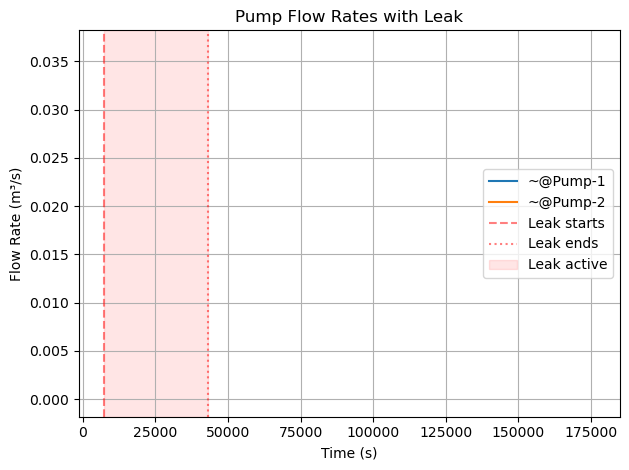

In [ ]:
# Split pipe 1017 and add a leak to the new node which starts at hour 2 and ends at hour 12
# Run the simulation with the leak
sim = wntr.sim.WNTRSimulator(wn)
results_WNTR = sim.run_sim()

# Plot timeseries of pump flowrates after introducing the leak
pump_flowrates = results_WNTR.link['flowrate'].loc[:,wn.pump_name_list]
ax = pump_flowrates.plot(title='Pump flowrate with leak (starts at 2hr, ends at 12hr)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Pump flowrate (m$^3$/s)')

# Optional: Add a vertical line to mark when the leak starts and ends
ax.axvline(x=2*3600, color='r', linestyle='--', alpha=0.5, label='Leak starts')
ax.axvline(x=12*3600, color='r', linestyle=':', alpha=0.5, label='Leak ends')
ax.legend()

plt.axvspan(2*3600, 12*3600, color='red', alpha=0.1, label='Leak active')
plt.title('Pump Flow Rates with Leak')
plt.xlabel('Time (s)')
plt.ylabel('Flow Rate (m³/s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Pressure Reduction (m)')

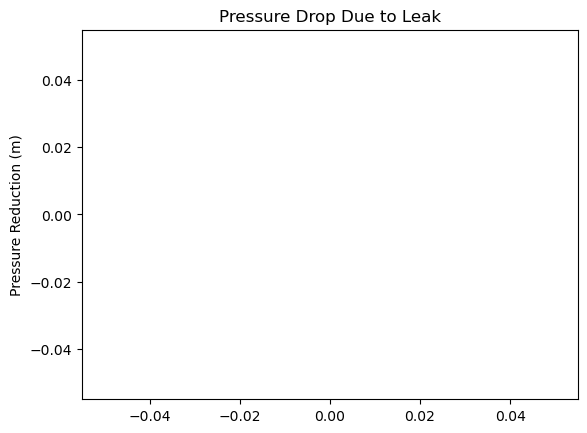

In [ ]:
# Compare pressure at leak node before/after
pressure_normal = results_WNTR.node['pressure'].loc[:, 'J-15']  # No leak
pressure_leak = results_with_leak.node['pressure'].loc[:, 'J-15']  # With leak

# Plot the difference
ax = (pressure_normal - pressure_leak).plot(title='Pressure Drop Due to Leak')
ax.set_ylabel('Pressure Reduction (m)')

In [ ]:
wn.node_name_list

['J-1',
 'J-10',
 'J-100',
 'J-101',
 'J-102',
 'J-103',
 'J-104',
 'J-105',
 'J-106',
 'J-107',
 'J-108',
 'J-109',
 'J-11',
 'J-110',
 'J-111',
 'J-112',
 'J-113',
 'J-114',
 'J-115',
 'J-116',
 'J-117',
 'J-118',
 'J-119',
 'J-12',
 'J-120',
 'J-121',
 'J-122',
 'J-123',
 'J-124',
 'J-125',
 'J-126',
 'J-127',
 'J-128',
 'J-129',
 'J-13',
 'J-130',
 'J-131',
 'J-132',
 'J-133',
 'J-134',
 'J-135',
 'J-136',
 'J-137',
 'J-138',
 'J-14',
 'J-140',
 'J-141',
 'J-142',
 'J-143',
 'J-144',
 'J-145',
 'J-146',
 'J-147',
 'J-148',
 'J-149',
 'J-15',
 'J-150',
 'J-151',
 'J-152',
 'J-153',
 'J-154',
 'J-155',
 'J-156',
 'J-157',
 'J-158',
 'J-159',
 'J-16',
 'J-160',
 'J-161',
 'J-162',
 'J-163',
 'J-164',
 'J-165',
 'J-166',
 'J-167',
 'J-168',
 'J-169',
 'J-17',
 'J-170',
 'J-171',
 'J-172',
 'J-173',
 'J-174',
 'J-175',
 'J-176',
 'J-177',
 'J-178',
 'J-179',
 'J-18',
 'J-180',
 'J-181',
 'J-182',
 'J-183',
 'J-184',
 'J-185',
 'J-186',
 'J-187',
 'J-188',
 'J-189',
 'J-19',
 'J-190',
 '

In [ ]:
wn.pipe_name_list

['P-1',
 'P-10',
 'P-100',
 'P-1000',
 'P-1001',
 'P-1002',
 'P-1003',
 'P-1004',
 'P-1005',
 'P-1006',
 'P-1007',
 'P-1008',
 'P-1009',
 'P-101',
 'P-1010',
 'P-1011',
 'P-1012',
 'P-1013',
 'P-1014',
 'P-1015',
 'P-1016',
 'P-1017',
 'P-1018',
 'P-1019',
 'P-102',
 'P-1020',
 'P-1021',
 'P-1022',
 'P-1023',
 'P-1024',
 'P-1025',
 'P-1026',
 'P-1027',
 'P-1028',
 'P-1029',
 'P-103',
 'P-1030',
 'P-1031',
 'P-1032',
 'P-1033',
 'P-1034',
 'P-1035',
 'P-1036',
 'P-1037',
 'P-1038',
 'P-1039',
 'P-104',
 'P-1040',
 'P-1041',
 'P-1042',
 'P-1043',
 'P-1044',
 'P-1045',
 'P-1046',
 'P-1047',
 'P-1048',
 'P-1049',
 'P-105',
 'P-1050',
 'P-1051',
 'P-1052',
 'P-1053',
 'P-1054',
 'P-1055',
 'P-1056',
 'P-1057',
 'P-1058',
 'P-1059',
 'P-106',
 'P-1060',
 'P-1061',
 'P-1062',
 'P-1063',
 'P-1064',
 'P-1065',
 'P-1066',
 'P-1067',
 'P-1068',
 'P-1069',
 'P-107',
 'P-1070',
 'P-1071',
 'P-1072',
 'P-1073',
 'P-1074',
 'P-1075',
 'P-1076',
 'P-1077',
 'P-1078',
 'P-1079',
 'P-108',
 'P-1080',
 '

In [ ]:
wn = wntr.morph.split_pipe(wn, pipe_name_to_split='P-1', 
                         new_pipe_name='P_1-A', 
                         new_junction_name='J-1A')

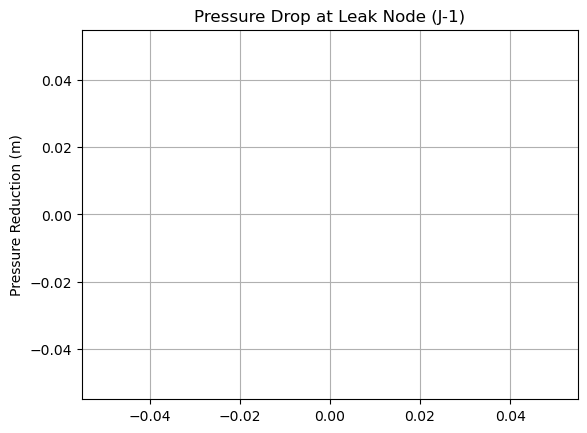

In [ ]:
# First, verify the leak node exists in the network
leak_node_name = 'J-1'  # or whatever name you used in split_pipe()

if leak_node_name not in wn.node_name_list:
    print(f"Error: Node '{leak_node_name}' not found in network. Available nodes:")
    print(wn.node_name_list)
    # Try to find a similar node (adapt this if your naming is different)
    possible_leak_nodes = [name for name in wn.node_name_list if '1' in name]
    if possible_leak_nodes:
        leak_node_name = possible_leak_nodes[0]
        print(f"Using alternative node: {leak_node_name}")
    else:
        raise ValueError(f"No suitable leak node found. Check your split_pipe() operation.")

# Now safely access the pressure data
try:
    pressure_normal = results_WNTR.node['pressure'].loc[:, leak_node_name]
    pressure_leak = results_with_leak.node['pressure'].loc[:, leak_node_name]
    
    # Plot the difference
    (pressure_normal - pressure_leak).plot(title=f'Pressure Drop at Leak Node ({leak_node_name})')
    plt.ylabel('Pressure Reduction (m)')
    plt.grid(True)
    
except KeyError as e:
    print(f"Could not access pressure data for node {leak_node_name}")
    print("Available nodes in results:", results_WNTR.node['pressure'].columns.tolist())